# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# reding the file
df = pd.read_csv("C:\\Users\\marpaka pradeep sai\\Downloads\\bank-full.csv", delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Outlier Detection

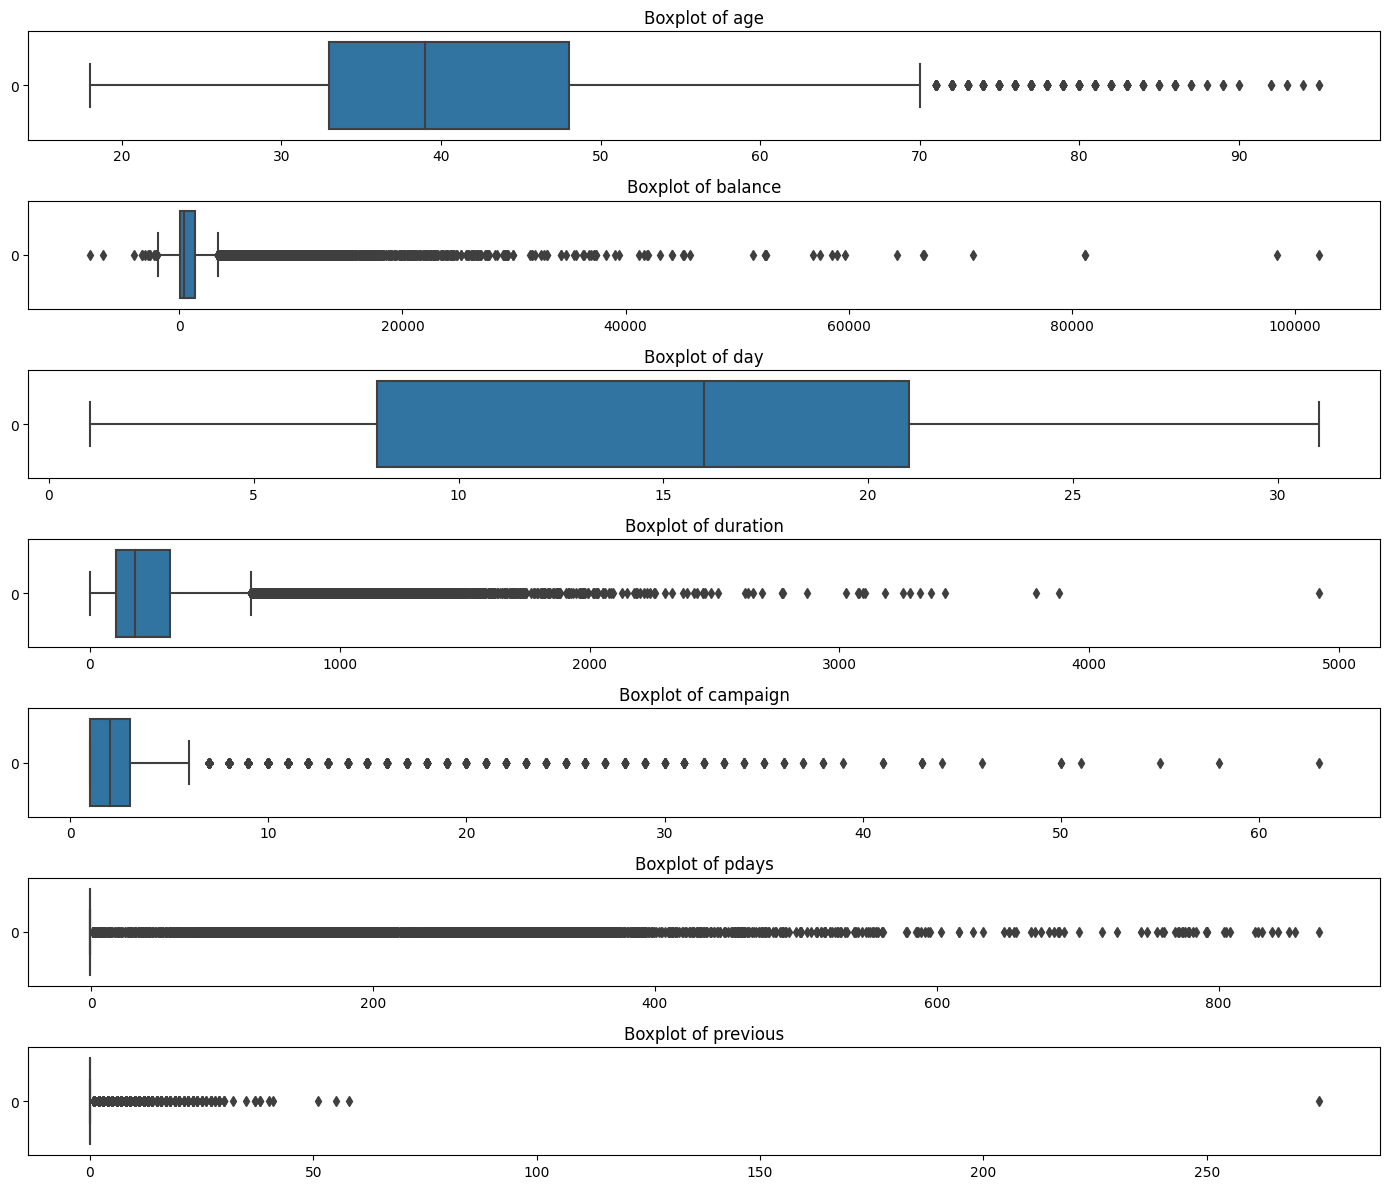

In [6]:
columns_to_plot = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize = (14, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(7, 1, i)
    sb.boxplot(data=df[column], orient='h')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## There are many outliers, but removing them isn't an option because they represent a significant portion of the data and might contain important information for building the model.

# 

# Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='y', ylabel='count'>

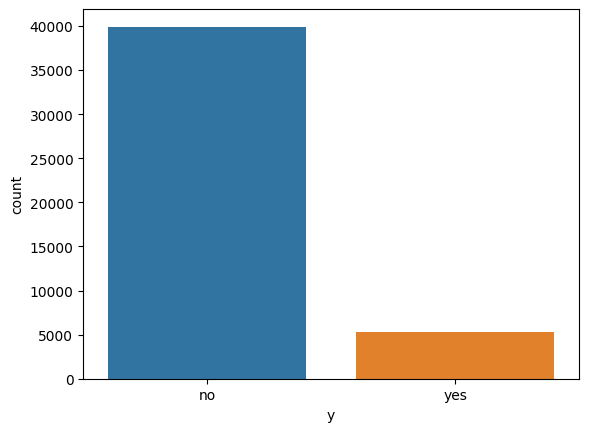

In [7]:
sb.countplot(x = 'y', data = df)

Text(0, 0.5, 'Subscription Frequency')

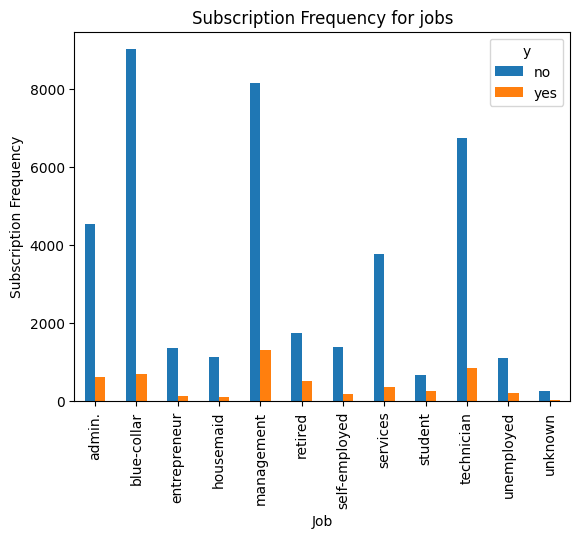

In [8]:
pd.crosstab(df['job'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for jobs")
plt.xlabel("Job")
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

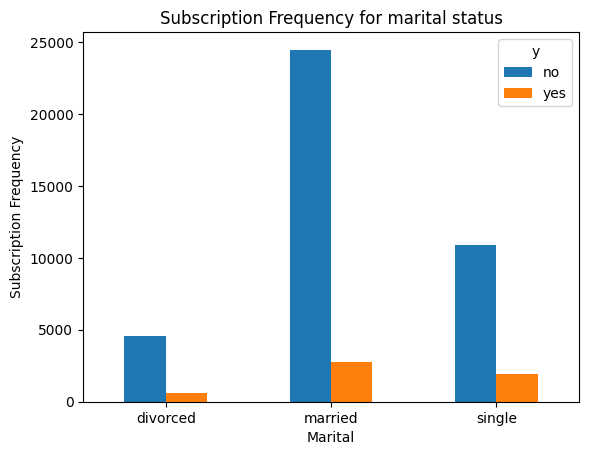

In [9]:
pd.crosstab(df['marital'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for marital status")
plt.xlabel("Marital")
plt.xticks(rotation = 0)
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

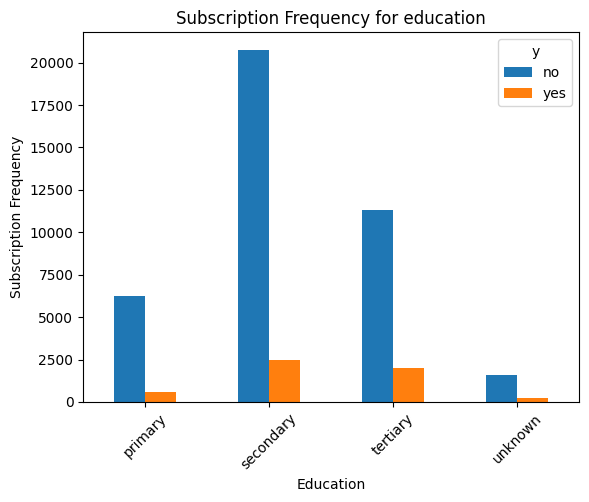

In [10]:
pd.crosstab(df['education'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for education")
plt.xlabel("Education")
plt.xticks(rotation = 45)
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

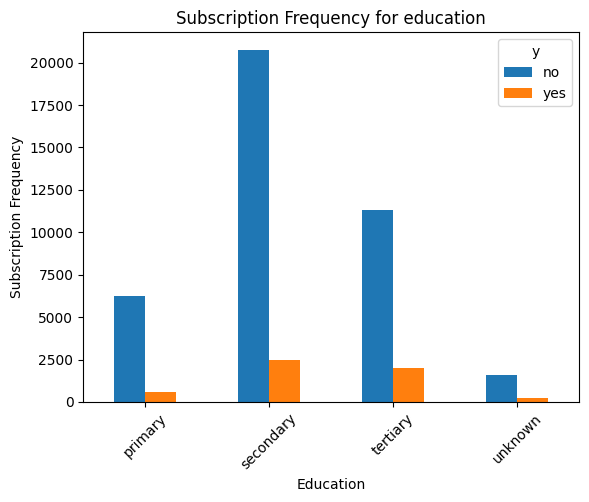

In [11]:
pd.crosstab(df['education'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for education")
plt.xlabel("Education")
plt.xticks(rotation = 45)
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

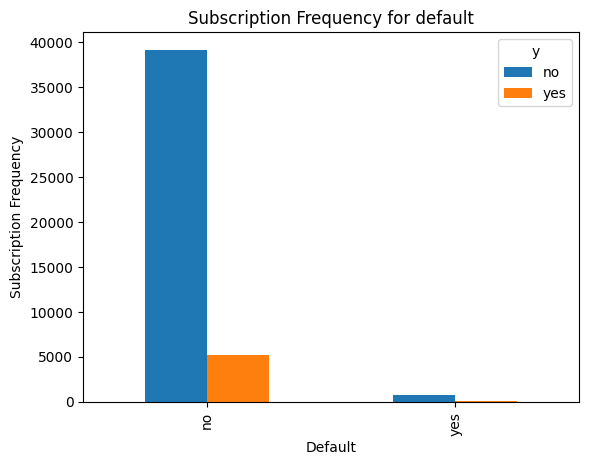

In [12]:
pd.crosstab(df['default'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for default")
plt.xlabel("Default")
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

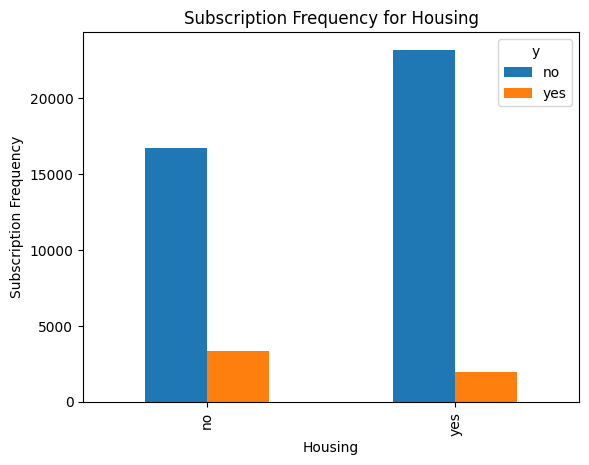

In [13]:
pd.crosstab(df['housing'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for Housing")
plt.xlabel("Housing")
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

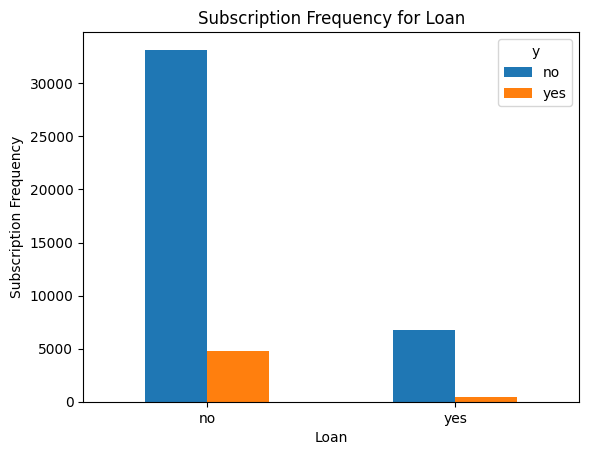

In [14]:
pd.crosstab(df['loan'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for Loan")
plt.xlabel("Loan")
plt.xticks(rotation = 0)
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

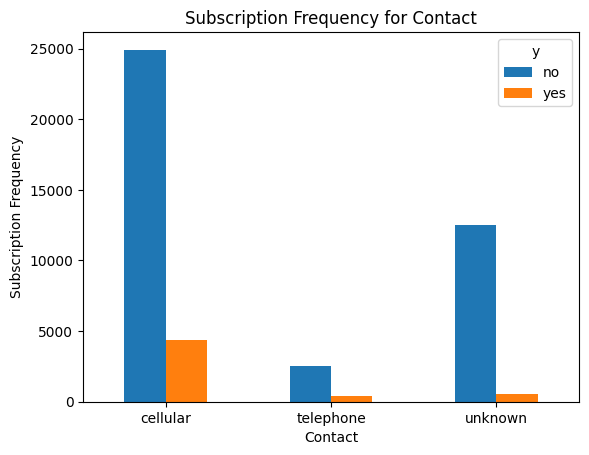

In [15]:
pd.crosstab(df['contact'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for Contact")
plt.xlabel("Contact")
plt.xticks(rotation = 0)
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

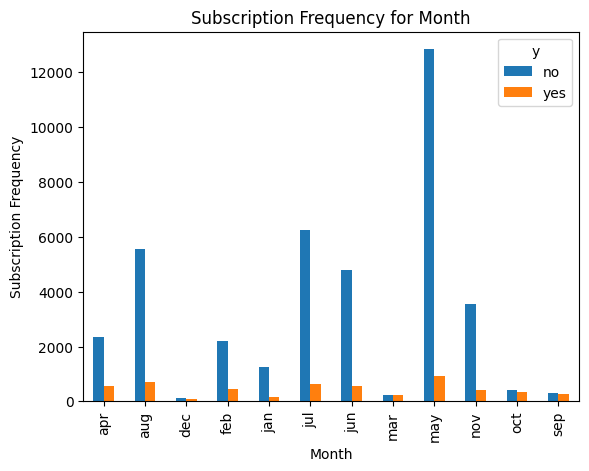

In [16]:
pd.crosstab(df['month'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for Month")
plt.xlabel("Month")
plt.ylabel("Subscription Frequency")

Text(0, 0.5, 'Subscription Frequency')

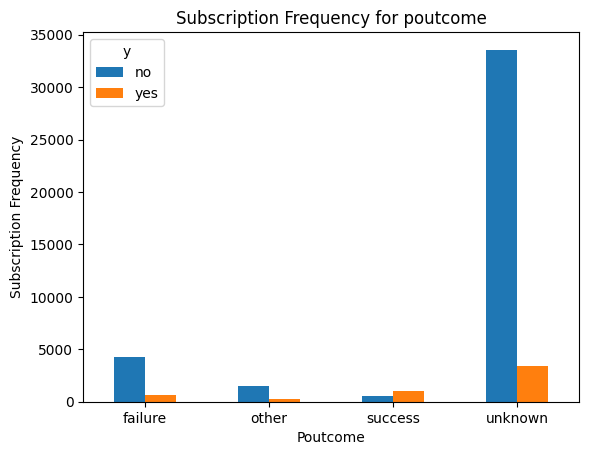

In [17]:
pd.crosstab(df['poutcome'], df['y']).plot(kind = "bar")
plt.title("Subscription Frequency for poutcome")
plt.xlabel("Poutcome")
plt.xticks(rotation = 0)
plt.ylabel("Subscription Frequency")

# Creating dummy variables to convert categorical data into a numerical format

In [18]:
df1=pd.get_dummies(df,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
df1['y']=df1['y'].replace('yes',1)
df1['y']=df1['y'].replace('no',0)
df1 = df1.replace({True : 1, False : 0})
df1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  int64
 9   job_blue-collar      45211 non-null  int64
 10  job_entrepreneur     45211 non-null  int64
 11  job_housemaid        45211 non-null  int64
 12  job_management       45211 non-null  int64
 13  job_retired          45211 non-null  int64
 14  job_self-employed    45211 non-null  int64
 15  job_services         45211 non-null  int64
 16  job_student          4

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming 'columns_to_scale' is a list of columns you want to scale
columns_to_scale = ['age', 'balance', 'duration']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(df1[columns_to_scale])

# Create a DataFrame from the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

# Replace old columns with scaled columns
df1[columns_to_scale] = scaled_df
df1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.606965,0.256419,5,0.011016,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.288529,-0.437895,5,-0.416127,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.747384,-0.446762,5,-0.707361,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.571051,0.047205,5,-0.645231,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.747384,-0.447091,5,-0.233620,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,17,2.791329,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,2.831227,0.120447,17,0.768224,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,2.925401,1.429593,17,3.373797,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,1.512791,-0.228024,17,0.970146,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df1['y'] = df1.pop('y') # moving the target column to the last
df1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,1.606965,0.256419,5,0.011016,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.288529,-0.437895,5,-0.416127,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.747384,-0.446762,5,-0.707361,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.571051,0.047205,5,-0.645231,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.747384,-0.447091,5,-0.233620,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,17,2.791329,3,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,2.831227,0.120447,17,0.768224,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,2.925401,1.429593,17,3.373797,5,184,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,1.512791,-0.228024,17,0.970146,4,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building

In [22]:
x = df1.iloc[:, :-1]
y = df1['y']

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logreg.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
cm

array([[38980,   942],
       [ 3538,  1751]], dtype=int64)

In [26]:
print("Accuracy Score :", accuracy_score(y, y_pred).round(2))

Accuracy Score : 0.9


In [27]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Sensitivity score :", recall_score(y, y_pred).round(3))
print("precision score :", precision_score(y, y_pred).round(3))
print("f1_score :", f1_score(y, y_pred).round(3))

Sensitivity score : 0.331
precision score : 0.65
f1_score : 0.439


In [28]:
# Predicted Probabilities

In [29]:
y_prob = logreg.predict_proba(x)[:,1]
y_prob

array([0.02077976, 0.01521522, 0.00330179, ..., 0.98234554, 0.12897243,
       0.19286823])

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

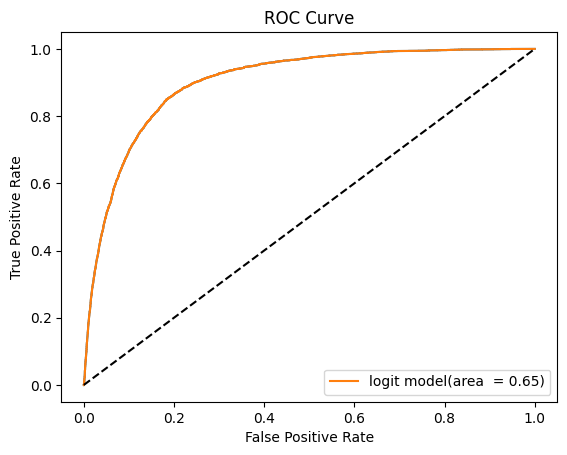

auc accuracy: 0.6537342306057978


In [31]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds = roc_curve(y,y_prob)
plt.plot(fpr,tpr)
auc = roc_auc_score(y,y_pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)